<a href="https://colab.research.google.com/github/shellkuangx/Machine-Learning/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.style.use("seaborn-white")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
advertising = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Advertising.csv",
                          usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
credit = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Credit.csv',
                     usecols=list(range(1,12)))
credit["Student2"] = credit.Student.map({'No':0,"Yes":1})
credit.head(3)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [ ]:
auto = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Auto.csv",na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 28.27)

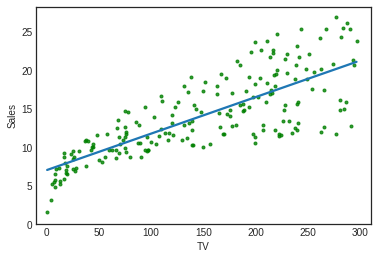

In [ ]:
sns.regplot(advertising.TV,advertising.Sales,order=1,ci=None,scatter_kws={'color':'g','s':9})
plt.xlim(-10,310)
plt.ylim(ymin=0)

In [ ]:
regr = skl_lm.LinearRegression()
X = scale(advertising.TV,with_mean=True,with_std=True).reshape(-1,1)
y= advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[4.07100612]


In [ ]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2,regr.intercept_+2,50)
B1 = np.linspace(regr.coef_-0.02,regr.coef_+0.02,50)
xx,yy = np.meshgrid(B0,B1,indexing="xy")
Z = np.zeros((B0.size,B1.size))
# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
  Z[i,j] = ((y-(xx[i,j]+X.ravel()**yy[i,j]))**2).sum()/1000
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


2.1025305831313514

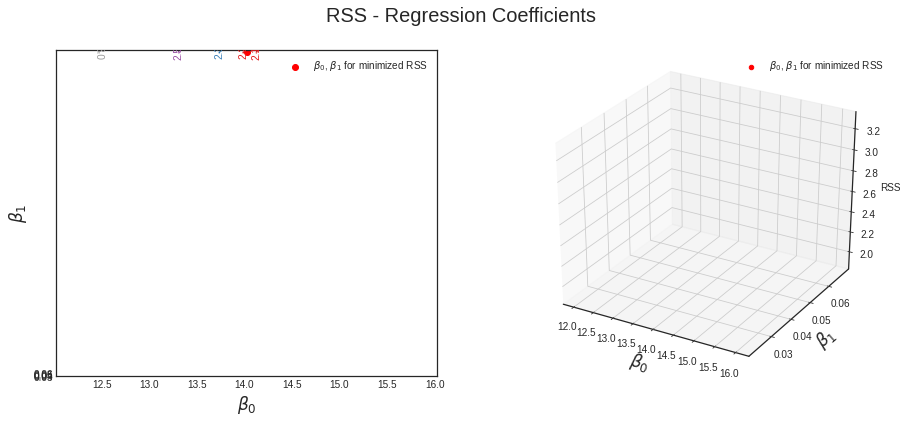

In [ ]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression Coefficients', fontsize=20)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

CS = ax1.contour(xx,yy,Z,cmap=plt.cm.Set1,levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_,regr.coef_[0],c='r',label=min_RSS)
ax1.clabel(CS,inline=True,fontsize=10,fmt="%1.1f")

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()



In [ ]:
est = smf.ols('Sales ~ TV',advertising).fit()
est.summary().tables[1]
((advertising.Sales -(est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.102530583131351

In [ ]:
regr = skl_lm.LinearRegression()
X = advertising.TV.values.reshape(-1,1)
y= advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)


7.032593549127695
[0.04753664]


In [ ]:
Sales_pred = regr.predict(X)
r2_score(y,Sales_pred)

0.611875050850071

In [ ]:
est = smf.ols('Sales ~ TV + Radio + Newspaper',advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [ ]:
advertising.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [21]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']]
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

2.9210999124051398
[0.18799423 0.04575482]
